In [68]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import yfinance as yf
import functions as f


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data Prepcocessing

In [69]:
tickerlist = ['BTC-USD']
df = yf.download(tickerlist, period = '1d', start = '2007-01-01',end = pd.Timestamp.today())
columns = tickerlist
df = df.iloc[:,4]['2019':]
df.head()

[*********************100%***********************]  1 of 1 completed


Date
2019-01-01    3843.520020
2019-01-02    3943.409424
2019-01-03    3836.741211
2019-01-04    3857.717529
2019-01-05    3845.194580
Name: Adj Close, dtype: float64

In [70]:
df = pd.DataFrame(df).pct_change().dropna()
df.index = df.index.astype(str)
df['Adj Close'] = df['Adj Close']
df['date'] = df.index

## Import backtest results generated from Model.ipynb

In [71]:
bt = pd.read_csv('final_btc_backtest_monitored.csv',index_col = 0)
bt['ensemble'] = bt.sum(axis =1)
bt['ensemble'] = list(map(f.major_vote,bt['ensemble']))
bt = bt[['ensemble']]
bt.columns = ['BTC-USD']
bt['BTC-USD'] = [1 if x == 1 else -1 for x in bt['BTC-USD']]
bt.index = bt.index.astype(str)
bt_returns = bt[['BTC-USD']]
bt_returns['date'] = bt_returns.index
bt_returns

,BTC-USD,date
2020-01-31,1,2020-01-31
2020-02-01,1,2020-02-01
2020-02-02,1,2020-02-02
2020-02-03,1,2020-02-03
2020-02-04,1,2020-02-04
...,...,...
2022-04-07,-1,2022-04-07
2022-04-08,1,2022-04-08
2022-04-09,1,2022-04-09
2022-04-10,1,2022-04-10


## The 'BTC-USD' Column indicates whether we the model predicts if btc is going up or down:
1. -1 => BTC going down => Short
2. 1 => BTC going up => Long
3. Transform the returns by multiplying the returns column by 1 or -1 to get te returns of the model
4. Perfrom df.cumprod() function to get the compounded returns

In [72]:

bt_returns = pd.read_csv('final_backtest_output.csv', index_col = 0)
bt_returns['date'] = pd.to_datetime(bt_returns.date.values).strftime('%Y-%m-%d')
bt_returns

,BTC-USD,date
31/1/2020,1,2020-01-31
1/2/2020,1,2020-01-02
2/2/2020,1,2020-02-02
3/2/2020,1,2020-03-02
4/2/2020,1,2020-04-02
...,...,...
7/4/2022,-1,2022-07-04
8/4/2022,1,2022-08-04
9/4/2022,1,2022-09-04
10/4/2022,1,2022-10-04


In [73]:
df = df.merge(bt_returns, on = 'date', how = 'right')

In [74]:
df.set_index('date',inplace = True)

In [75]:
df.head()

,Adj Close,BTC-USD
date,,
2020-01-31,-0.016665,1
2020-01-02,-0.029819,1
2020-02-02,-0.005165,1
2020-03-02,0.035879,1
2020-04-02,0.028281,1


In [76]:
df['Passive Hold Strategy'] = df['Adj Close']
df['NLP Trading Strategy'] = df['BTC-USD'] * df['Adj Close']
df = df[['Passive Hold Strategy','NLP Trading Strategy']]
df.head()

,Passive Hold Strategy,NLP Trading Strategy
date,,
2020-01-31,-0.016665,-0.016665
2020-01-02,-0.029819,-0.029819
2020-02-02,-0.005165,-0.005165
2020-03-02,0.035879,0.035879
2020-04-02,0.028281,0.028281


In [77]:
returns = 100*((1+df).cumprod())
returns.head()

,Passive Hold Strategy,NLP Trading Strategy
date,,
2020-01-31,98.333537,98.333537
2020-01-02,95.401300,95.401300
2020-02-02,94.908598,94.908598
2020-03-02,98.313862,98.313862
2020-04-02,101.094305,101.094305


## Backtest results from start of 2021 to now

Text(0, 0.5, 'Compounded Returns (%)')

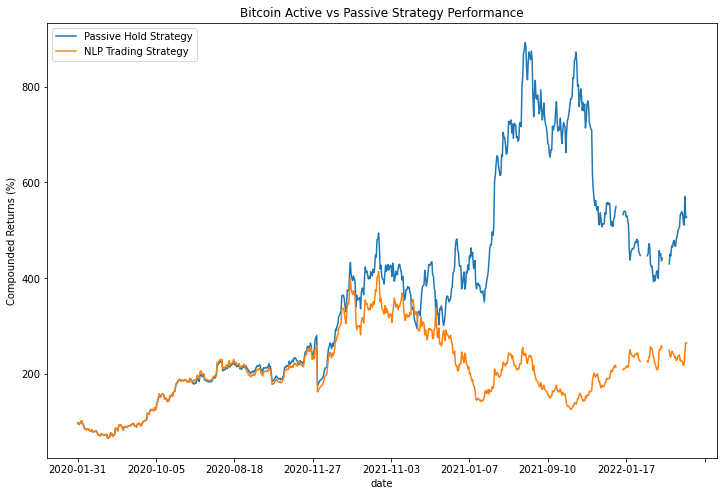

In [78]:
returns.plot(figsize = (12,8), title = 'Bitcoin Active vs Passive Strategy Performance')
plt.ylabel('Compounded Returns (%)')